In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
sns.set_style('whitegrid')

Read dataset

In [2]:
df = pd.read_csv("argentina_cars.csv")

See some values

In [3]:
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


Door column shows the amount of doors the car has, change to plural

In [4]:
df.rename(columns={'door':'doors'},inplace=True)

Check the types of each column

In [5]:
df.dtypes

money           int64
brand          object
model          object
year            int64
color          object
fuel_type      object
doors         float64
gear           object
motor          object
body_type      object
kilometres      int64
currency       object
dtype: object

Check for duplicates

In [6]:
df[df.duplicated()]

,money,brand,model,year,color,fuel_type,doors,gear,motor,body_type,kilometres,currency


Check for null values

In [7]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
doors          0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

In [8]:
df.loc[df['color'].isnull()]

,money,brand,model,year,color,fuel_type,doors,gear,motor,body_type,kilometres,currency
208,16000,BMW,X5,2000,NaN,Nafta,5.0,Manual,4.4,SUV,132000,dólares
231,6300000,Toyota,Corolla,2018,NaN,Nafta,4.0,Automática,1.8,Sedán,16500,pesos
256,2890000,Peugeot,408,2013,NaN,Nafta,4.0,Manual,2.0,Sedán,129400,pesos
290,3050000,Renault,Logan,2016,NaN,Nafta,4.0,Manual,1.6,Sedán,37300,pesos
295,1690000,Chevrolet,Celta,2013,NaN,Nafta,3.0,Manual,1.4,Hatchback,109000,pesos
329,7500000,Volkswagen,Sharan,2014,NaN,Nafta,5.0,Automática,2.0,Monovolumen,66000,pesos
331,2750000,Citroën,DS3,2012,NaN,Nafta,3.0,Manual,1.6,Hatchback,95000,pesos
344,8700000,Citroën,Jumpy,2022,NaN,Diésel,3.0,Manual,1.6,Furgón,1000,pesos
384,2990000,Volkswagen,Suran Cross,2014,NaN,Nafta,5.0,Manual,1.6,Monovolumen,120000,pesos
443,1698000,Ford,Ka,2011,NaN,Nafta,3.0,Manual,1.6,Hatchback,97000,pesos


In [9]:
df.loc[df['motor'].isnull()]

,money,brand,model,year,color,fuel_type,doors,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
12,3500000,Renault,Sandero,2022,Plateado,Nafta,5.0,Manual,NaN,Sedán,111111,pesos
14,41900,BMW,Serie 1,2020,Negro,Nafta,5.0,Automática,NaN,Hatchback,34800,dólares
16,38500,Chevrolet,Trailblazer,2019,Gris,Diésel,5.0,Automática,NaN,SUV,73000,dólares
24,2800000,Fiat,Bravo,2013,Negro,Nafta,5.0,Manual,NaN,Hatchback,124000,pesos
31,10200000,Toyota,Hilux,2022,Negro,Diésel,4.0,Manual,NaN,Pick-Up,21000,pesos
34,3150000,Ford,Fiesta,2016,Rojo,Nafta,5.0,Manual,NaN,Hatchback,68000,pesos
55,23500,Hyundai,Genesis,2012,Gris,Nafta,2.0,Manual,NaN,Coupé,104270,dólares
56,79900,Porsche,Panamera,2010,Blanco,Nafta,4.0,Automática,NaN,Sedán,59141,dólares


In [10]:
df.loc[df['body_type'].isnull()]

,money,brand,model,year,color,fuel_type,doors,gear,motor,body_type,kilometres,currency
278,1760000,Fiat,Uno,2010,Rojo,Nafta,5.0,Manual,NaN,NaN,128000,pesos


Drop na values, as there is no reference to fill them

In [11]:
df.dropna(inplace=True)

Get the amount of cars for each brand

In [12]:
df['brand'].value_counts()

Volkswagen       86
Ford             55
Chevrolet        49
Peugeot          47
Toyota           43
Renault          43
Citroën          29
Fiat             23
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              11
Nissan            8
Hyundai           8
Audi              8
RAM               6
Dodge             4
Kia               3
Mitsubishi        2
Volvo             2
Mini              2
DS                2
Subaru            1
Chery             1
Suzuki            1
Baic              1
Name: brand, dtype: int64

Get models for each brand

In [13]:
df.groupby('brand')['model'].value_counts()

brand       model       
Audi        A1              2
            R8 Coupé        2
            A3 Sportback    1
            A4              1
            Q5              1
                           ..
Volkswagen  Voyage          2
            Bora            1
            Suran Cross     1
Volvo       960             1
            C30             1
Name: model, Length: 148, dtype: int64

Colors count

In [14]:
df['color'].value_counts()

Gris           156
Blanco         149
Negro           56
Plateado        51
Azul            25
Rojo            22
Dorado           8
Marrón           4
Violeta          4
Celeste          4
Naranja          3
Gris oscuro      2
Verde            2
Beige            1
Name: color, dtype: int64

Get colors for each brand

In [15]:
df.groupby('brand')['color'].value_counts()

brand       color  
Audi        Blanco     4
            Azul       2
            Gris       2
BMW         Gris       4
            Azul       2
                      ..
Volkswagen  Naranja    1
            Rojo       1
            Violeta    1
Volvo       Gris       1
            Negro      1
Name: color, Length: 120, dtype: int64

Get colors for each model

In [16]:
df.groupby('model')['color'].value_counts()

model   color 
1500    Gris      3
        Blanco    2
        Rojo      1
2008    Blanco    3
        Gris      3
                 ..
Voyage  Azul      1
        Gris      1
X55     Negro     1
XV      Blanco    1
Yaris   Blanco    4
Name: color, Length: 310, dtype: int64

Get fuel types and count

In [17]:
fuel_types = df['fuel_type'].value_counts()

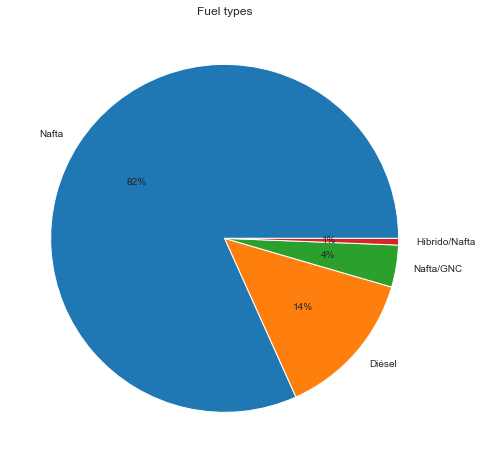

In [18]:
fig,ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette("tab10")
plt.pie(fuel_types,labels=fuel_types.index,colors=colors, autopct='%.0f%%')
plt.title('Fuel types')
plt.show()

Get gears and count

In [19]:
gears = df['gear'].value_counts()

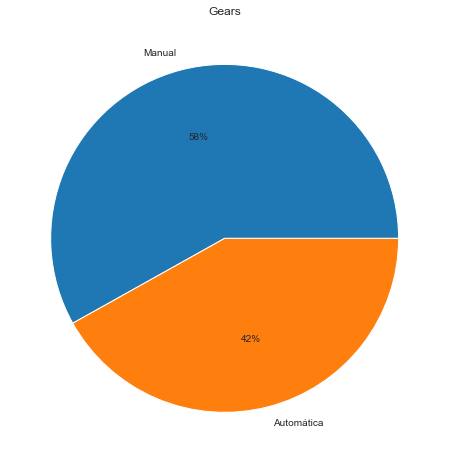

In [20]:
fig,ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette("tab10")
plt.pie(gears,labels=gears.index,colors=colors, autopct='%.0f%%')
plt.title('Gears')
plt.show()

Get body types and count

In [21]:
df['body_type'].value_counts()

Hatchback      178
SUV            126
Sedán           92
Pick-Up         53
Monovolumen     16
Coupé           10
Furgón           7
Rural            3
Crossover        1
Minivan          1
Name: body_type, dtype: int64

Get body types for each brand

In [22]:
df.groupby('brand')['body_type'].value_counts()

brand       body_type  
Audi        Hatchback       4
            Coupé           2
            SUV             1
            Sedán           1
BMW         Coupé           8
                           ..
Volkswagen  SUV            16
            Sedán          16
            Monovolumen     3
Volvo       Hatchback       1
            Rural           1
Name: body_type, Length: 74, dtype: int64

Get doors and count

In [23]:
df['doors'].value_counts()

5.0    296
4.0    150
3.0     23
2.0     18
Name: doors, dtype: int64

Check currencies

In [24]:
currency = df['currency'].value_counts()

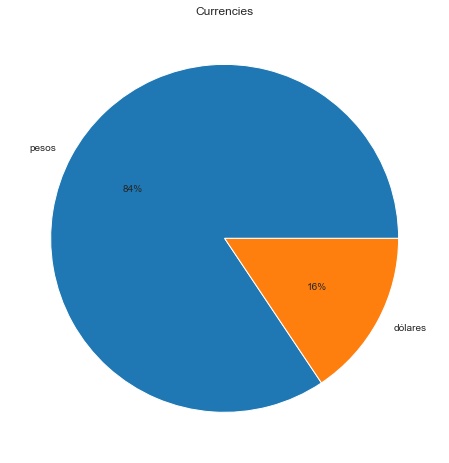

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
colors = sns.color_palette("tab10")
plt.pie(currency,labels=currency.index,colors=colors, autopct='%.0f%%')
plt.title('Currencies')
plt.show()

Check currencies by brand

In [26]:
brand_currencies = df.groupby('brand')['currency'].value_counts()

In [27]:
brand_currencies

brand          currency
Audi           dólares      4
               pesos        4
BMW            dólares      9
               pesos        2
Baic           pesos        1
Chery          pesos        1
Chevrolet      pesos       49
Citroën        pesos       29
DS             pesos        2
Dodge          pesos        4
Fiat           pesos       22
               dólares      1
Ford           pesos       51
               dólares      4
Honda          pesos       15
               dólares      3
Hyundai        pesos        7
               dólares      1
Jeep           pesos       14
               dólares      6
Kia            dólares      2
               pesos        1
Mercedes-Benz  dólares     12
               pesos        2
Mini           dólares      2
Mitsubishi     dólares      1
               pesos        1
Nissan         pesos        8
Peugeot        pesos       45
               dólares      2
RAM            dólares      5
               pesos        1
Renault        p

Convert dollars to pesos (exchange rate may vary, so I will use blue exchange rate)

In [28]:
### Scrape web page with exchange rate
request = requests.get('https://dolarhoy.com/cotizaciondolarblue')
soup = bs(request.content,features="lxml")

In [29]:
### Find divs that contain the value we are looking for
data = soup.find(class_ = 'tile is-parent is-8').find_all(class_ = 'value')
### Get text from div and format
exchange_rate = data[1].get_text().replace('$','')
exchange_rate = float(exchange_rate)

In [30]:
type(exchange_rate)

float

In [31]:
### If price is in pesos do the conversion, else use money column
df['price'] = np.where(df['currency']=='pesos',df['money']/exchange_rate,df['money'])

In [32]:
### Convert values to int
df['price'] = df['price'].astype(int)

In [33]:
### Money and currency columns wont be used anymore
df.drop(columns={'money','currency'},inplace=True)

In [34]:
df.head()

,brand,model,year,color,fuel_type,doors,gear,motor,body_type,kilometres,price
1,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,20666
2,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,35500
4,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,11047
5,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,34500
6,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,25000


Prices distribution 

In [35]:
df['price'].describe()

count       487.000000
mean      15147.552361
std       27472.401407
min        2285.000000
25%        6000.000000
50%        8380.000000
75%       14583.000000
max      430000.000000
Name: price, dtype: float64

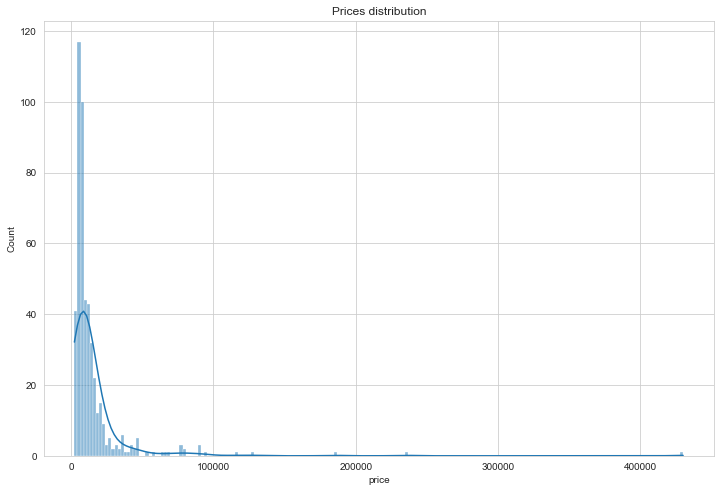

In [36]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x="price",kde='true')
ax.set(title='Prices distribution')
plt.show()

Prices in each brand 

In [37]:
### Find maximum, minimum, average and median price for each brand
df.groupby('brand').agg({'price':['max','min','mean','median','count']})

price                                    
                  max    min          mean   median count
brand                                                    
Audi           430000   7599  98622.750000  13830.5     8
BMW            115700   5714  52103.818182  35500.0    11
Baic            11009  11009  11009.000000  11009.0     1
Chery            6285   6285   6285.000000   6285.0     1
Chevrolet       26571   2285   7342.755102   6380.0    49
Citroën         13695   3238   6379.000000   6266.0    29
DS              19733  19733  19733.000000  19733.0     2
Dodge           17333   4666  14061.250000  17123.0     4
Fiat            26500   3619   7150.913043   5619.0    23
Ford           128000   3333  12677.800000   7616.0    55
Honda           34900   4190  13196.111111  11999.0    18
Hyundai         42900   6647  15083.500000  13114.0     8
Jeep            90000   7428  22040.150000  15809.0    20
Kia             25000  11409  16769.666667  13900.0     3
Mercedes-Benz  185000  10599  37003.500000  25750.0    14
Mini            19500  15000  17250.000000  17250.0     2
Mitsubishi      13499  12361  12930.000000  12930.0     2
Nissan          15142   5123   8378.125000   6561.5     8
Peugeot         28500   3810   7811.063830   6857.0    47
RAM             78500  22837  66454.500000  77495.0     6
Renault         11790   3038   6567.209302   6266.0    43
Subaru           4761   4761   4761.000000   4761.0     1
Suzuki           3609   3609   3609.000000   3609.0     1
Toyota          58000   5314  18830.209302  12742.0    43
Volkswagen      46990   2952  12967.941860  11179.5    86
Volvo           10000   8900   9450.000000   9450.0     2

Finding most and least expensive car 

In [38]:
expensive = df.loc[df['price'].idxmax()]
cheap = df.loc[df['price'].idxmin()]
print('Most expensive: '+ expensive['brand'] + ' '+ expensive['model'] + ' valued at ' + str(expensive['price']))
print('Least expensive: '+ cheap['brand'] + ' ' + cheap['model'] + ' valued at ' + str(cheap['price']))

Most expensive: Audi R8 Coupé valued at 430000
Least expensive: Chevrolet Corsa valued at 2285


Kilometres distribution

In [39]:
df['kilometres'].describe()

count       487.000000
mean      74603.648871
std       46789.593120
min         500.000000
25%       44000.000000
50%       65000.000000
75%       99000.000000
max      335000.000000
Name: kilometres, dtype: float64

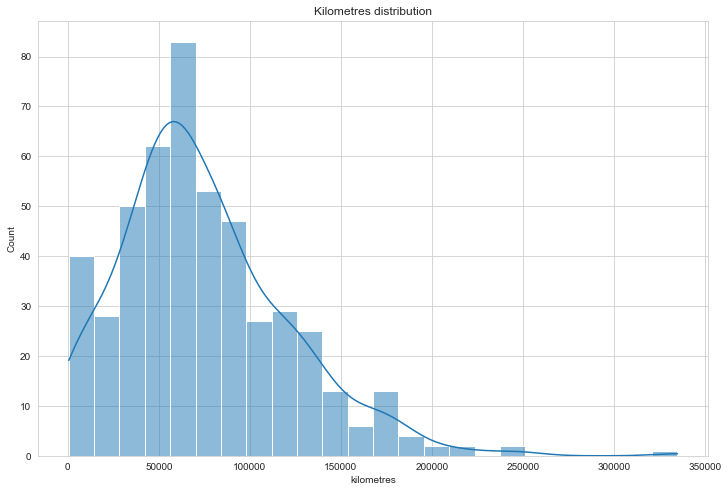

In [40]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x="kilometres",kde='true')
ax.set(title='Kilometres distribution')
plt.show()

Years distribution 

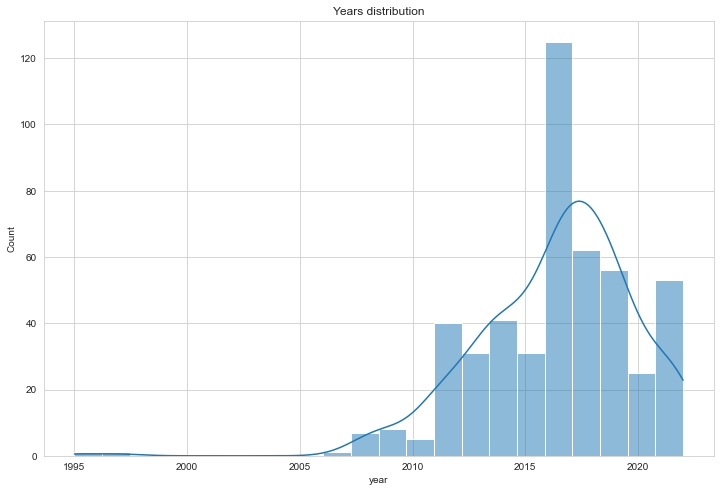

In [41]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=df, x="year",kde='true')
ax.set(title='Years distribution')
plt.show()

Most repeated models

In [42]:
df['model'].value_counts()

Amarok         17
208            13
Focus III      13
Corolla        12
Onix           12
               ..
Uno             1
Mégane III      1
Trailblazer     1
XV              1
Serie 4         1
Name: model, Length: 148, dtype: int64

Brands, kilometres and price

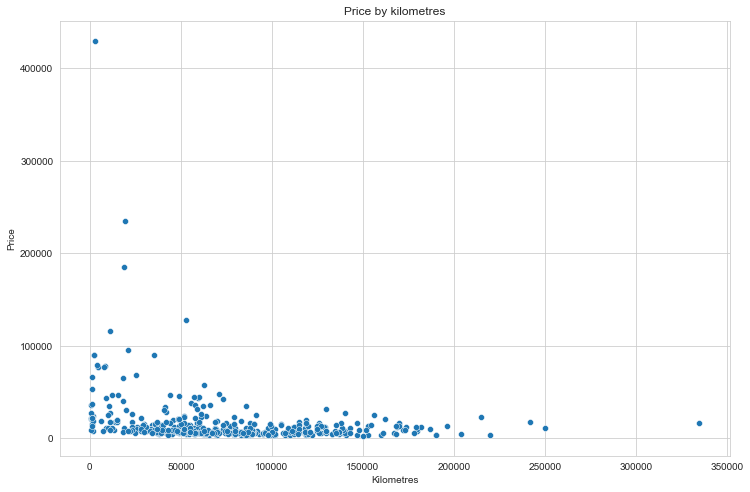

In [43]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df, x="kilometres", y="price")
ax.set(title='Price by kilometres',xlabel = 'Kilometres', ylabel='Price')
plt.show()

In [44]:
### Dollar per kilometer
df['$/km'] = round(df['price']/df['kilometres'],2)

In [45]:
df['$/km'].describe()

count    487.000000
mean       1.960513
std        9.568871
min        0.020000
25%        0.070000
50%        0.120000
75%        0.275000
max      143.330000
Name: $/km, dtype: float64

In [46]:
df.groupby('brand').agg({'$/km':['max','min','mean','median','count']})

$/km                              
                  max   min       mean median count
brand                                              
Audi           143.33  0.08  19.863750  0.210     8
BMW             36.00  0.05   9.781818  0.540    11
Baic             0.28  0.28   0.280000  0.280     1
Chery            0.09  0.09   0.090000  0.090     1
Chevrolet        9.24  0.02   0.339592  0.100    49
Citroën          0.23  0.02   0.093448  0.070    29
DS               1.32  1.31   1.315000  1.315     2
Dodge            0.41  0.04   0.257500  0.290     4
Fiat             4.05  0.02   0.295217  0.090    23
Ford            59.32  0.02   2.455818  0.140    55
Honda            1.50  0.03   0.236667  0.110    18
Hyundai          4.82  0.05   0.712500  0.170     8
Jeep            71.00  0.05   6.808000  0.395    20
Kia              0.16  0.11   0.133333  0.130     3
Mercedes-Benz    9.95  0.04   1.225714  0.200    14
Mini             0.16  0.14   0.150000  0.150     2
Mitsubishi       0.08  0.07   0.075000  0.075     2
Nissan           0.50  0.05   0.167500  0.120     8
Peugeot         17.64  0.03   0.542340  0.080    47
RAM             16.49  0.29   9.338333  9.575     6
Renault          0.45  0.03   0.122558  0.100    43
Subaru           0.02  0.02   0.020000  0.020     1
Suzuki           0.02  0.02   0.020000  0.020     1
Toyota          52.90  0.03   3.638605  0.380    43
Volkswagen      54.47  0.02   1.327093  0.140    86
Volvo            0.08  0.05   0.065000  0.065     2

Years, price and brand

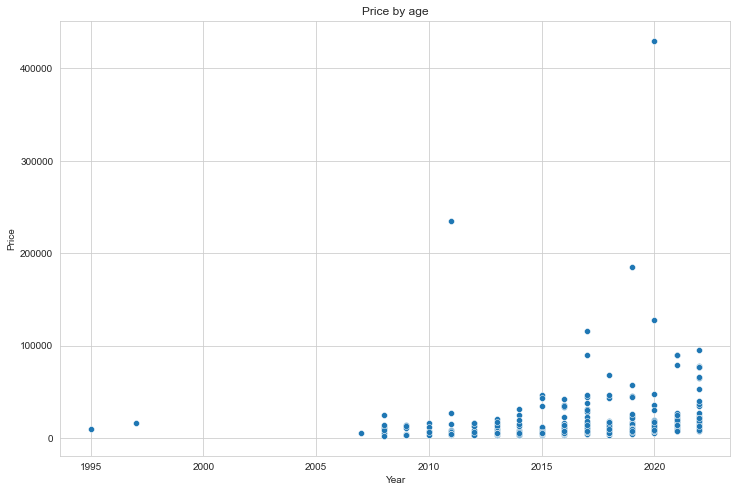

In [47]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df, x="year", y="price")
ax.set(title='Price by age',xlabel = 'Year', ylabel='Price')
plt.show()

In [48]:
df.groupby('brand').agg({'year':['max','min','median','count']})

year                    
                max   min  median count
brand                                  
Audi           2020  2011  2012.0     8
BMW            2022  2008  2016.0    11
Baic           2019  2019  2019.0     1
Chery          2017  2017  2017.0     1
Chevrolet      2022  2008  2016.0    49
Citroën        2020  2009  2015.0    29
DS             2021  2021  2021.0     2
Dodge          2018  2011  2018.0     4
Fiat           2022  2011  2017.0    23
Ford           2022  1997  2017.0    55
Honda          2020  2010  2016.0    18
Hyundai        2019  2010  2016.0     8
Jeep           2022  2012  2018.0    20
Kia            2020  2014  2016.0     3
Mercedes-Benz  2019  2008  2015.0    14
Mini           2014  2013  2013.5     2
Mitsubishi     2016  2012  2014.0     2
Nissan         2020  2013  2018.0     8
Peugeot        2022  2011  2016.0    47
RAM            2022  2017  2022.0     6
Renault        2021  2011  2018.0    43
Subaru         2011  2011  2011.0     1
Suzuki         2009  2009  2009.0     1
Toyota         2022  2010  2019.0    43
Volkswagen     2022  2009  2017.0    86
Volvo          2008  1995  2001.5     2

Price and doors

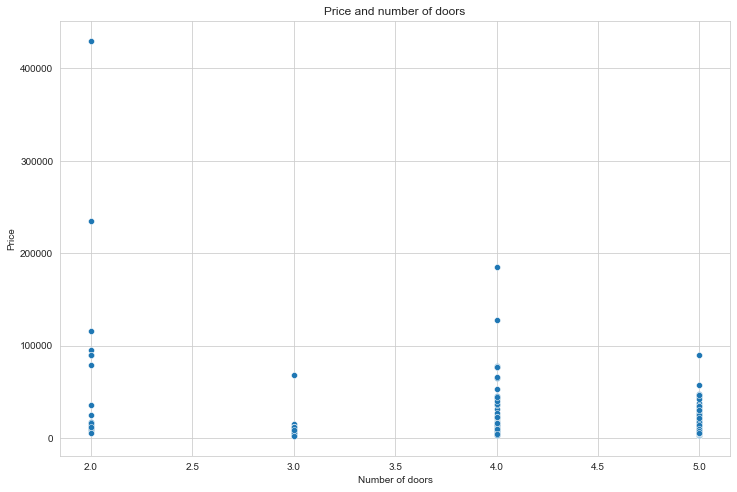

In [49]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df, x="doors", y="price")
ax.set(title='Price and number of doors',xlabel = 'Number of doors', ylabel='Price')
plt.show()

Price, brand and motor

In [50]:
df.groupby('motor').agg({'price':['max','min','mean','median','count']})

price                                       
                  max     min           mean    median count
motor                                                       
1.0             24500    3142    7655.400000    5037.5    10
1.2             19733    3038    9475.000000    8380.0    12
1.3             34500    6647   15215.800000    8095.0     5
1.4             26990    2952    8451.547170    5885.0    53
1.5             21714    3609    9117.974359    6740.0    39
1.6             43990    2285    8075.854430    6857.0   158
1.6 MSI Nafta   12952   12952   12952.000000   12952.0     1
1.8             36990    3714   11009.311111   10000.0    45
2                9904    4666    7586.666667    8190.0     3
2.0            128000    3810   17346.381579   12085.0    76
2.1             32000   12552   20723.666667   17619.0     3
2.2             25000   10599   15635.750000   13472.0     4
2.3              9904    8933    9418.500000    9418.5     2
2.4             35500    4666   16500.789474   15028.0    19
2.5             42900    6571   15273.500000   10742.5     8
2.8             58000    9333   27770.866667   23619.0    15
3              185000   38500  111750.000000  111750.0     2
3.0            115700    6000   46912.600000   36068.0    10
3.0 TD          26990   26990   26990.000000   26990.0     1
3.2             22571   12361   16502.400000   17123.0     5
3.5             43000   43000   43000.000000   43000.0     1
3.6             46900   17123   24619.750000   17228.0     4
5.2            430000  235000  332500.000000  332500.0     2
5.7             78500   22837   66454.500000   77495.0     6
6.4             90000   90000   90000.000000   90000.0     1
TOYOTA 2.8      52900   52900   52900.000000   52900.0     1
TURBO           35500   35500   35500.000000   35500.0     1

In [51]:
df.groupby('brand')['motor'].value_counts()

brand       motor        
Audi        2.0              4
            1.4              2
            5.2              2
BMW         2.0              4
            3.0              4
                            ..
Volkswagen  2.5              3
            3.0              3
            1.6 MSI Nafta    1
Volvo       2.0              1
            3.0              1
Name: motor, Length: 100, dtype: int64

Price and fuel

In [52]:
df.groupby('fuel_type').agg({'price':['max','min','mean','median','count']})

price                                    
                  max    min          mean   median count
fuel_type                                                
Diésel         128000   3810  20798.253731  14837.0    67
Híbrido/Nafta   36990  21504  27428.000000  23790.0     3
Nafta          430000   2285  14531.798995   7828.0   398
Nafta/GNC        8933   3904   6180.789474   6076.0    19

Price and color

In [53]:
df.groupby('color').agg({'price':['max','min','mean','median','count']})

price                                    
                max    min          mean   median count
color                                                  
Azul         430000   3238  36193.960000  11409.0    25
Beige          4000   4000   4000.000000   4000.0     1
Blanco       235000   3038  15725.275168   8742.0   149
Celeste       89990   5142  29669.750000  11773.5     4
Dorado        19809   4000   8692.375000   6371.0     8
Gris         185000   3333  14659.564103   7990.0   156
Gris oscuro   35500   4666  20083.000000  20083.0     2
Marrón        12742   5619   8923.250000   8666.0     4
Naranja       12952   5314   9066.333333   8933.0     3
Negro         95000   2952  13115.642857   8916.5    56
Plateado      38500   2285   9789.980392   7523.0    51
Rojo          64900   3523  11268.636364   6761.5    22
Verde         19733  10456  15094.500000  15094.5     2
Violeta       11980   5047   8727.750000   8942.0     4

In [54]:
df.groupby('body_type').agg({'price':['max','min','mean','median','count']})

price                                     
                max    min           mean   median count
body_type                                               
Coupé        430000  10438  120542.800000  89995.0    10
Crossover      4666   4666    4666.000000   4666.0     1
Furgón        12552   3790    7202.285714   6704.0     7
Hatchback     68000   2285    8448.898876   6218.5   178
Minivan       17619  17619   17619.000000  17619.0     1
Monovolumen   42900   3904    9632.125000   6609.5    16
Pick-Up      128000   6000   26639.377358  16190.0    53
Rural         10000   3619    6730.000000   6571.0     3
SUV           90000   4000   15616.055556  11980.0   126
Sedán        185000   3142   11315.336957   7504.0    92

Age and kilometres

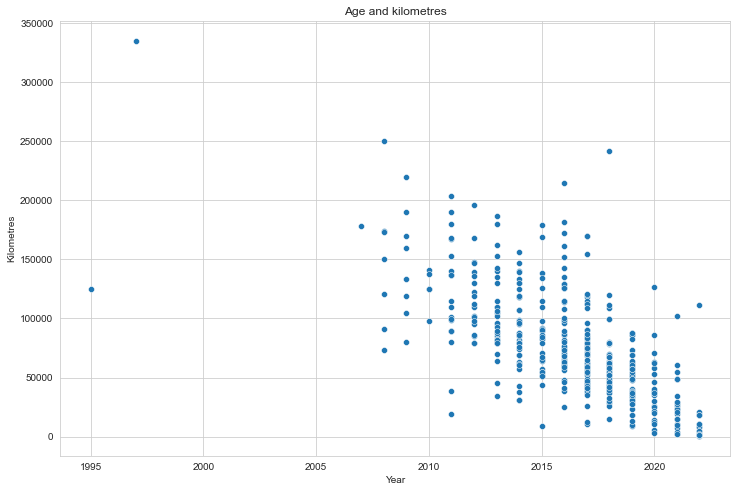

In [55]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.scatterplot(data=df, x="year", y="kilometres")
ax.set(title='Age and kilometres',xlabel = 'Year', ylabel='Kilometres')
plt.show()